In [1]:
using Pkg;
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Work/PhD_Thesis/SNImproved2bbSpectra`


In [2]:
# Pkg.add("Revise")
# Pkg.add("StatsPlots")
# Pkg.add("UnROOT")
# Pkg.add("StatsBase")
# Pkg.add("LinearAlgebra")
# Pkg.add("FHist")
# Pkg.add("DataFramesMeta")
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Polynomials");

In [3]:
using Revise
using StatsPlots, UnROOT, StatsBase, LinearAlgebra
using FHist, DataFramesMeta, Distributions

ENV["COLUMNS"] = 2000
ENV["LINES"] = 20

gr()
default(fmt = :jpg)
theme(
    :dao;
    size           = (800, 800),
    legend         = :topleft,
    guidefontsize  = 16,
    tickfontsize   = 12,
    titlefontsize  = 16,
    legendfontsize = 12,
    left_margin    = 4Plots.mm,
    right_margin   = 8Plots.mm,
    top_margin     = 4Plots.mm,
    bottom_margin  = 6Plots.mm,
    dpi            = 5,
    :colorbar_titlefontsize => 16,
    widen = :false
);

In [4]:
include("/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/MiscFuncs.jl")
using .MiscFuncs

Sampling Rejection

In [11]:

function solve_quadratic(a, b, c)
    d  = sqrt(b^2 - 4*a*c)
    return (-b - d) / (2*a), (-b + d) / (2*a)
end

solve_quadratic (generic function with 1 method)

In [69]:
function sample_theta_dif(_k::Real)
    
    if (_k == 0.0)
        return 0.5
    end
    
    a = _k/4 
    b = 1/2
    c = 1/2 - _k/4 - rand(Uniform())
    θ = solve_quadratic(a,b,c)
    if( -1.0 <= θ[1] <= 1.0 )
        return θ[1]
    elseif ( -1.0 <= θ[2] <= 1.0 )
        return θ[2]
    else
        @show "soulution is outside of range u ∈ (-1.0, 1.0)"
    end
    return -100.0
end

sample_theta_dif (generic function with 1 method)

In [78]:
xs = []
for _ in 1:1e6
    push!(xs, sample_theta_dif(-1))
end

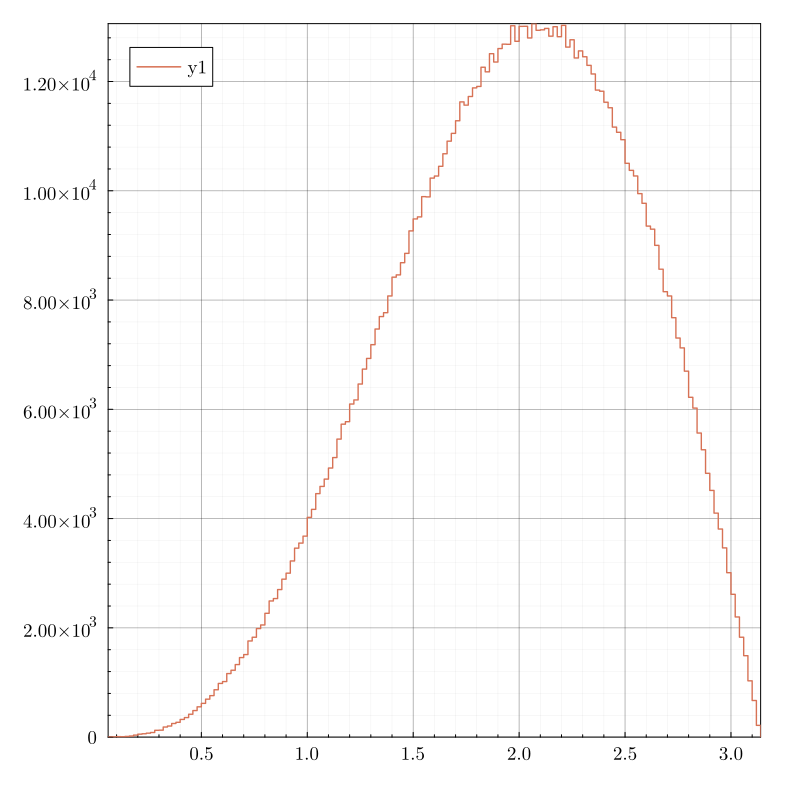

┌ Error: Error watching manifest
│   exception = (Revise.ReviseEvalException("/home/shoram/.julia/packages/JLLWrappers/QpMQW/src/toplevel_generators.jl:156", MethodError(Qt5Base_jll.var"#make_wrapper_dict#4"{Qt5Base_jll.var"#parse_wrapper_platform#3"}(Qt5Base_jll.var"#parse_wrapper_platform#3"()), ("/home/shoram/.julia/packages/Qt5Base_jll/lpIK6/src", ["aarch64-apple-darwin.jl", "aarch64-linux-gnu-cxx03.jl", "aarch64-linux-gnu-cxx11.jl", "armv7l-linux-gnueabihf-cxx03.jl", "armv7l-linux-gnueabihf-cxx11.jl", "i686-linux-gnu-cxx03.jl", "i686-linux-gnu-cxx11.jl", "i686-w64-mingw32-cxx03.jl", "i686-w64-mingw32-cxx11.jl", "powerpc64le-linux-gnu-cxx03.jl", "powerpc64le-linux-gnu-cxx11.jl", "x86_64-apple-darwin.jl", "x86_64-linux-gnu-cxx03.jl", "x86_64-linux-gnu-cxx11.jl", "x86_64-unknown-freebsd.jl", "x86_64-w64-mingw32-cxx03.jl", "x86_64-w64-mingw32-cxx11.jl"]), 0x0000000000007ebe), Any[(top-level scope at toplevel_generators.jl:156, 1)]), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing}

In [79]:
stephist(acos.(xs))